In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from lyft_dataset_sdk.lyftdataset import LyftDataset
from test_data_loader import level5testdata
import matplotlib.pyplot as plt
from prepare_lyft_data import parse_train_csv,get_pc_in_image_fov,level5data

number of scenes: 218


/Users/kanhua/miniconda3/envs/lyft-3d/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/kanhua/miniconda3/envs/lyft-3d/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/kanhua/miniconda3/envs/lyft-3d/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/kanhua/miniconda3/envs/lyft-3d

In [3]:
import pickle

In [4]:
object_detction_file="/Users/kanhua/Dropbox/Programming/lyft-3d-main/detected_results.pickle"
with open(object_detction_file,'rb') as fp:
    det_results=pickle.load(fp)

In [5]:
pred_file="/Users/kanhua/Dropbox/Programming/lyft-3d-main/pred.csv"
pred_obj=parse_train_csv(pred_file,with_score=True)

100%|██████████| 24335/24335 [00:00<00:00, 38243.70it/s]


In [6]:
data_idx=100

In [7]:
from skimage.io import imread

In [8]:
from vis_util import draw_bounding_box_on_image_array

In [9]:
## Load prediction

In [10]:
pred_obj.iloc[data_idx,:]

sample_id     d607fce03782431f5ba701a9580142e55374ef66af4dac...
object_id                                                     0
center_x                                                 853.19
center_y                                                2585.85
center_z                                                -20.491
width                                                   1.61764
length                                                   4.0843
height                                                   1.5289
yaw                                         -1.8806798268346547
class_name                                                  car
Name: 100, dtype: object

In [11]:
sample_token=pred_obj['sample_id'][data_idx]
print(sample_token)

d607fce03782431f5ba701a9580142e55374ef66af4dac9594dd4d247458c0ee


In [12]:
sample_record=level5testdata.get("sample",sample_token)

In [13]:
lidar_top_token=sample_record['data']['LIDAR_TOP']
lidar_path=level5testdata.get_sample_data_path(lidar_top_token)

In [14]:
from lyft_dataset_sdk.utils.data_classes import LidarPointCloud

In [15]:
lpc=LidarPointCloud.from_file(lidar_path)

In [16]:
from prepare_lyft_data import transform_box_from_world_to_sensor_coordinates,get_train_data_sample_token_and_box

In [17]:
_,box=get_train_data_sample_token_and_box(data_idx,pred_obj)

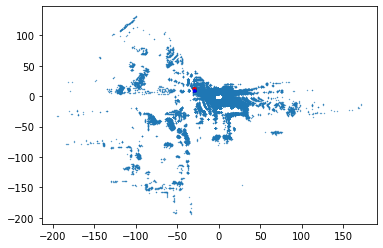

In [18]:
box_in_lidar_coord=transform_box_from_world_to_sensor_coordinates(box,lidar_top_token,level5testdata)
fig,ax=plt.subplots()
pts=lpc.points
ax.scatter(pts[0,:],pts[1,:],s=0.1)
#ax.set_xlim([-30,-20])
#ax.set_ylim([-20,10])
view_mtx=np.eye(2)
box_in_lidar_coord.render(ax,view=view_mtx)

In [19]:
camera_token=sample_record['data']['CAM_FRONT']

In [20]:
box_in_camera_coord=transform_box_from_world_to_sensor_coordinates(box,camera_token,level5testdata)

In [21]:
camera_image_path,_,cam_intrinsic=level5testdata.get_sample_data(camera_token)

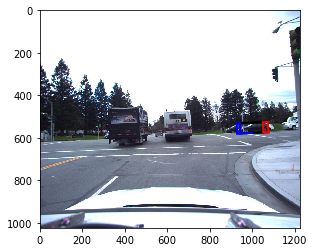

In [22]:
image_array=imread(camera_image_path)
fig,ax=plt.subplots()
ax.imshow(image_array)
box_in_camera_coord.render(ax,view=cam_intrinsic,normalize=True)

In [23]:
pred_obj.iloc[15,:]

sample_id     956cf7224b3e689dd4f759dd7149e8a1afd10cfd1a19a6...
object_id                                                     4
center_x                                                 857.27
center_y                                                2591.53
center_z                                               -21.0229
width                                                   1.66635
length                                                   4.1251
height                                                  1.45595
yaw                                           -2.39307365753206
class_name                                                  car
Name: 15, dtype: object

In [24]:
pred_obj.iloc[14,:]

sample_id     956cf7224b3e689dd4f759dd7149e8a1afd10cfd1a19a6...
object_id                                                     3
center_x                                                861.136
center_y                                                2568.23
center_z                                               -20.8436
width                                                   1.57177
length                                                  3.63726
height                                                  1.59796
yaw                                        -0.25142494653628633
class_name                                                  car
Name: 14, dtype: object

In [25]:
pred_obj.iloc[17,:]

sample_id     5aa08358467ed43f8a5e96e016c47d8cbd0466c4552aa4...
object_id                                                     0
center_x                                                  855.7
center_y                                                2595.03
center_z                                               -20.4514
width                                                   1.57884
length                                                  3.89795
height                                                  1.57198
yaw                                          1.3784420676956044
class_name                                                  car
Name: 17, dtype: object

In [26]:
from object_classifier import TLClassifier
from vis_util import draw_bounding_boxes_on_image_array,draw_bounding_box_on_image_array

In [27]:
tlc=TLClassifier()

In [28]:
det_box=tlc.detect_multi_object(image_array,score_threshold=[0.6,0.6,0.6],rearrange_to_pointnet_convention=False)
det_box

array([[0.51570392, 0.73660594, 0.55923474, 0.90500218, 0.74056804,
        0.        ]])

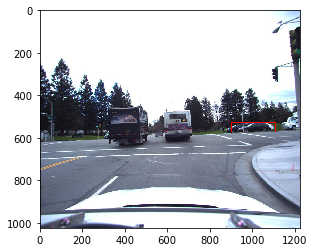

In [29]:
image_to_draw=np.copy(image_array)
det_box=det_box[:,0:4]
draw_bounding_boxes_on_image_array(image_to_draw,det_box)
plt.imshow(image_to_draw)

In [30]:
det_box=tlc.detect_multi_object(image_array,score_threshold=[0.6,0.6,0.6],rearrange_to_pointnet_convention=True)
mask, pc_3d, pc_2d, lpc, img=get_pc_in_image_fov(lidar_top_token,'CAM_FRONT',level5testdata,bounding_box=det_box[1,0:4])

IndexError: index 1 is out of bounds for axis 0 with size 1

In [ ]:
pc_2d.shape

In [ ]:
fig,ax=plt.subplots()
ax.imshow(img)
ax.scatter(pc_2d[0,:],pc_2d[1,:])

In [ ]:
image_array.shape